In [5]:
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q

!pip install opendatasets -q

'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
# import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

import opendatasets as od

ModuleNotFoundError: No module named 'numpy'

### Load Dataset

In [4]:
# download dataset
od.download("https://www.kaggle.com/datasets/vuppalaadithyasairam/bone-fracture-detection-using-xrays")

NameError: name 'od' is not defined

In [4]:
BATCH_SIZE = 32
IMAGE_SIZE = (224,224)

In [5]:
train_data_dir = "C:/Users/reddy/Downloads/archive/archive (6)/train"
test_data_dir = "C:/Users/reddy/Downloads/archive/archive (6)/val"

train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='training',
                                                         validation_split=0.1,
                                                         seed=42)

validation_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='validation',
                                                         validation_split=0.1,
                                                         seed=42)

test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE)

Found 8863 files belonging to 2 classes.
Using 7977 files for training.
Found 8863 files belonging to 2 classes.
Using 886 files for validation.
Found 600 files belonging to 2 classes.


In [6]:
class_names = train_data.class_names
class_names

['fractured', 'not fractured']

In [7]:
for image_batch,label_batch in train_data.take(1):
    print(image_batch.shape)
    print(label_batch.shape)

(32, 224, 224, 3)
(32,)


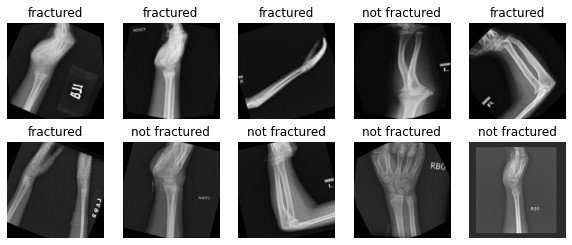

In [8]:
# plot data sample
plt.figure(figsize=(10,4))
for image,label in train_data.take(1):
    for i in range(10):
        ax = plt.subplot(2,5,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[label[i]])
        plt.axis('off')

### Scaling Images

In [9]:
for image,label in train_data.take(1):
    for i in range(1):
      print(image)

tf.Tensor(
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
 

In [10]:
train_data = train_data.map(lambda x,y:(x/255,y))
validation_data = validation_data.map(lambda x,y:(x/255,y))
test_data = test_data.map(lambda x,y:(x/255,y))

### Data Augmentation

In [11]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",input_shape=(224,224,3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
  ]
)

### Model Building

In [12]:
model = tf.keras.models.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)      

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

### Model Training

In [15]:
start_time = time.time()

history = model.fit(train_data,
                    epochs=20,
                    validation_data=validation_data)

end_time = time.time()

Epoch 1/20
250/250 [==============================] - 313s 1s/step - loss: 0.6572 - accuracy: 0.6055 - val_loss: 0.7026 - val_accuracy: 0.4334
Epoch 2/20
250/250 [==============================] - 289s 1s/step - loss: 0.5873 - accuracy: 0.6558 - val_loss: 0.5246 - val_accuracy: 0.7517
Epoch 3/20
250/250 [==============================] - 321s 1s/step - loss: 0.5283 - accuracy: 0.7172 - val_loss: 0.4758 - val_accuracy: 0.7438
Epoch 4/20
250/250 [==============================] - 318s 1s/step - loss: 0.4538 - accuracy: 0.7801 - val_loss: 0.3523 - val_accuracy: 0.8634
Epoch 5/20
250/250 [==============================] - 259s 1s/step - loss: 0.4177 - accuracy: 0.7983 - val_loss: 0.3325 - val_accuracy: 0.8589
Epoch 6/20
250/250 [==============================] - 1634s 7s/step - loss: 0.3679 - accuracy: 0.8339 - val_loss: 0.2310 - val_accuracy: 0.9108
Epoch 7/20
250/250 [==============================] - 270s 1s/step - loss: 0.3390 - accuracy: 0.8479 - val_loss: 0.3713 - val_accuracy: 0.845

In [16]:
print(f'Total time for training {(end_time-start_time):.3f} seconds')

Total time for training 7047.331 seconds


### Performance Analysis

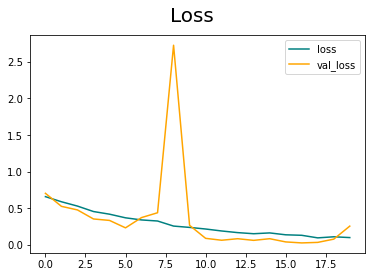

In [17]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

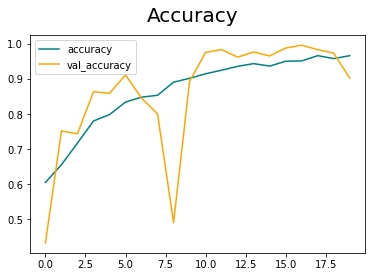

In [18]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()

### Model Evaluation

In [19]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [20]:
for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 [==============================] - 0s 338ms/step


In [21]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.3681592>

In [22]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.30833334>

In [23]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.51166666>

### Test

In [24]:
!pip install opencv-python -q

In [25]:
import cv2

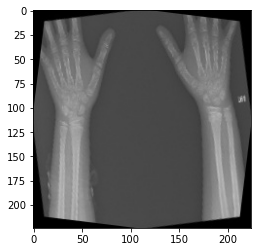

In [26]:
img = cv2.imread('C:/Users/reddy/Downloads/archive/archive (6)/train/fractured/10-rotated1-rotated1.jpg')
plt.imshow(img)
plt.show()

In [27]:
resized_image = tf.image.resize(img, IMAGE_SIZE)
scaled_image = resized_image/255

In [28]:
scaled_image.shape

TensorShape([224, 224, 3])

In [29]:
np.expand_dims(scaled_image, 0).shape

(1, 224, 224, 3)

In [30]:
yhat = model.predict(np.expand_dims(scaled_image, 0))

1/1 [==============================] - 0s 56ms/step


In [31]:
yhat

array([[1.3186661e-19]], dtype=float32)

In [32]:
class_names

['fractured', 'not fractured']

In [33]:
if yhat > 0.5:
    print(f'{class_names[1]}')
else:
    print(f'{class_names[0]}')

fractured
